In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from speechbrain.inference.interfaces import foreign_class
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/home/paige/miniconda3/envs/speechbrain/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [81]:
classifier = foreign_class(source="speechbrain/emotion-recognition-wav2vec2-IEMOCAP", pymodule_file="custom_interface.py", classname="CustomEncoderWav2vec2Classifier", run_opts={"device":"cuda"})

/home/paige/miniconda3/envs/speechbrain/lib/python3.12/site-packages/transformers/configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
speechbrain.lobes.models.huggingface_transformers.huggingface - Wav2Vec2Model is frozen.
/home/paige/Documents/BERST/speech_brain/speechbrain/utils/checkpoints.py:194: FutureWarning: You are using `

## IEMOCAP confirmation

In [3]:
iemocap_1 = pd.read_csv('../IEMOCAP_full_release/labels/session_1_labels.csv')
iemocap_2 = pd.read_csv('../IEMOCAP_full_release/labels/session_2_labels.csv')
iemocap_3 = pd.read_csv('../IEMOCAP_full_release/labels/session_3_labels.csv')
iemocap_4 = pd.read_csv('../IEMOCAP_full_release/labels/session_4_labels.csv')
iemocap_5 = pd.read_csv('../IEMOCAP_full_release/labels/session_5_labels.csv')

iemocap_1 = iemocap_1[iemocap_1['affect'].isin(['Happiness', 'Sadness', 'Neutral', 'Anger'])]
iemocap_2 = iemocap_2[iemocap_2['affect'].isin(['Happiness', 'Sadness', 'Neutral', 'Anger'])]
iemocap_3 = iemocap_3[iemocap_3['affect'].isin(['Happiness', 'Sadness', 'Neutral', 'Anger'])]
iemocap_4 = iemocap_4[iemocap_4['affect'].isin(['Happiness', 'Sadness', 'Neutral', 'Anger'])]
iemocap_5 = iemocap_5[iemocap_5['affect'].isin(['Happiness', 'Sadness', 'Neutral', 'Anger'])]

combined_sessions = pd.concat([iemocap_1, iemocap_2, iemocap_3, iemocap_4, iemocap_5])

In [4]:
out_probs = []
scores = []
indexes = []
text_labs = []
for index, file in combined_sessions.iterrows():
    out_prob, score, index, text_lab = classifier.classify_file(f"../{file['file_location']}")
    out_probs.append(out_prob)
    scores.append(score)
    indexes.append(index)
    text_labs.append(text_lab)

In [15]:
predictions = [label for file in text_labs for label in file]
predictions = [file.replace('neu', 'Neutral') for file in predictions]
predictions = [file.replace('sad', 'Sadness') for file in predictions]
predictions = [file.replace('hap', 'Happiness') for file in predictions]
predictions = [file.replace('ang', 'Anger') for file in predictions]

In [17]:
combined_sessions['predictions'] = predictions

In [19]:
combined_sessions.to_csv('iemocap_confirmation_4_class.csv', index=False)

In [22]:
print(f"UA score: {accuracy_score(combined_sessions['affect'], combined_sessions['predictions'])}")
print(f"WA score: {balanced_accuracy_score(combined_sessions['affect'], combined_sessions['predictions'])}")

UA score: 0.7519463408791472
WA score: 0.7463301288119966


## BERSt test

In [80]:
berst_test = pd.read_csv('../shout-data/test_data.csv')
berst_train = pd.read_csv('../shout-data/train_data.csv')
berst_validation = pd.read_csv('../shout-data/validation_data.csv')

berst_test = berst_test[berst_test['affect'].isin(['happiness', 'sadness', 'neutral', 'anger'])]
berst_train = berst_train[berst_train['affect'].isin(['happiness', 'sadness', 'neutral', 'anger'])]
berst_validation = berst_validation[berst_validation['affect'].isin(['happiness', 'sadness', 'neutral', 'anger'])]

combined_berst = pd.concat([berst_test, berst_train, berst_validation])

In [82]:
out_probs = []
scores = []
indexes = []
text_labs = []
for index, file in combined_berst.iterrows():
    out_prob, score, index, text_lab = classifier.classify_file(f"../{file['file_location']}")
    out_probs.append(out_prob)
    scores.append(score)
    indexes.append(index)
    text_labs.append(text_lab)

In [83]:
predictions = [label for file in text_labs for label in file]
predictions = [file.replace('neu', 'neutral') for file in predictions]
predictions = [file.replace('sad', 'sadness') for file in predictions]
predictions = [file.replace('hap', 'happiness') for file in predictions]
predictions = [file.replace('ang', 'anger') for file in predictions]

In [84]:
combined_berst['predictions'] = predictions

In [85]:
combined_berst.to_csv('zero_shot_berst_4_class.csv', index=False)

In [86]:
print(f"UA score: {accuracy_score(combined_berst['affect'], combined_berst['predictions'])}")
print(f"WA score: {balanced_accuracy_score(combined_berst['affect'], combined_berst['predictions'])}")

UA score: 0.3176532769556025
WA score: 0.3070536605666963


/home/paige/miniconda3/envs/speechbrain/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [35]:
cf_matrix = confusion_matrix(combined_berst['predictions'], combined_berst['affect'])
print(cf_matrix)

[[504   0 498 441]
 [  7   0  13  10]
 [140   0 146 130]
 [  0   0   0   0]]


## Retrain on 7 classes with IEMOCAP

In [10]:
iemocap_0_results_7 = pd.read_csv('recipes/IEMOCAP/emotion_recognition/iemocap_7_class_session_0.csv')
iemocap_1_results_7 = pd.read_csv('recipes/IEMOCAP/emotion_recognition/iemocap_7_class_session_1.csv')
iemocap_2_results_7 = pd.read_csv('recipes/IEMOCAP/emotion_recognition/iemocap_7_class_session_2.csv')
iemocap_3_results_7 = pd.read_csv('recipes/IEMOCAP/emotion_recognition/iemocap_7_class_session_3.csv')
iemocap_4_results_7 = pd.read_csv('recipes/IEMOCAP/emotion_recognition/iemocap_7_class_session_4.csv')

combined_iemocap_results_7 = pd.concat([iemocap_0_results_7, iemocap_1_results_7, iemocap_2_results_7, iemocap_3_results_7, iemocap_4_results_7])

In [77]:
print(f"UA score: {accuracy_score(combined_iemocap_results_7['affect'], combined_iemocap_results_7['predictions'])}")
print(f"WA score: {balanced_accuracy_score(combined_iemocap_results_7['affect'], combined_iemocap_results_7['predictions'])}")

UA score: 0.62184493491794
WA score: 0.4777280882289518


In [78]:
cf_matrix = confusion_matrix(combined_iemocap_results_7['affect'], combined_iemocap_results_7['predictions'])
cf_matrix_normal = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

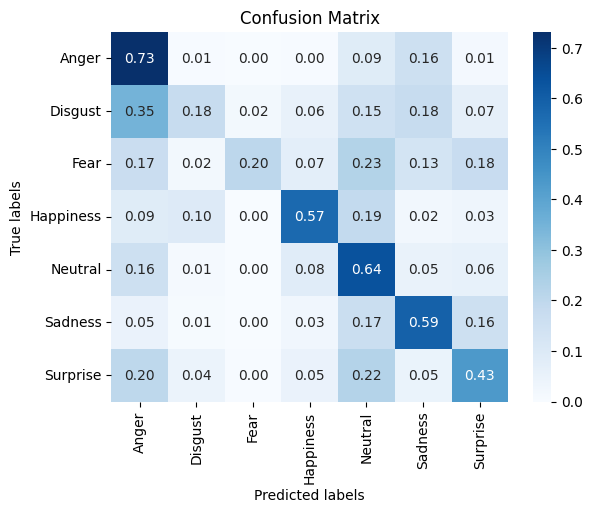

In [79]:
class_names = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

sns.heatmap(cf_matrix_normal, annot=True, fmt='.2f', cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Add labels to the heatmap
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [3]:
classifier = foreign_class(
    source="/home/paige/Documents/BERST/speech_brain/results_3/train_with_wav2vec2/1993/save/CKPT+2024-07-12+01-19-59+00",
    pymodule_file="/home/paige/Documents/BERST/speech_brain/recipes/IEMOCAP/emotion_recognition/custom_interface.py",
    hparams_file="/home/paige/Documents/BERST/speech_brain/recipes/IEMOCAP/emotion_recognition/hparams/inference_7.yaml",
    classname="CustomEncoderWav2vec2Classifier",
    savedir="/home/paige/Documents/BERST/speech_brain/results_3/train_with_wav2vec2/1993/save/CKPT+2024-07-12+01-19-59+00"
)

/home/paige/miniconda3/envs/speechbrain/lib/python3.12/site-packages/transformers/configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
speechbrain.lobes.models.huggingface_transformers.huggingface - Wav2Vec2Model is frozen.
/home/paige/Documents/BERST/speech_brain/speechbrain/utils/checkpoints.py:194: FutureWarning: You are using `

In [4]:
berst_test = pd.read_csv('../shout-data/test_data.csv')
berst_train = pd.read_csv('../shout-data/train_data.csv')
berst_validation = pd.read_csv('../shout-data/validation_data.csv')

combined_berst = pd.concat([berst_test, berst_train, berst_validation])

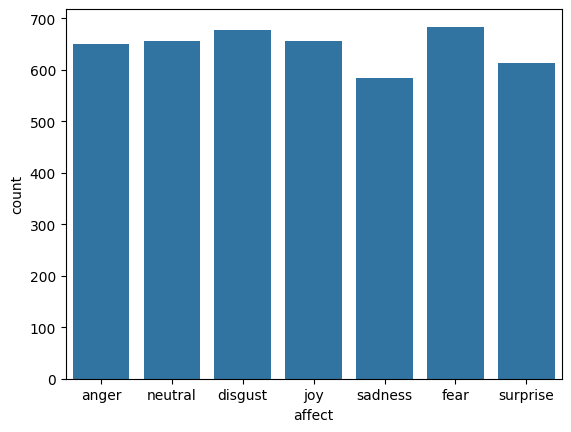

In [22]:
ax = sns.countplot(x="affect", data=combined_berst)

In [23]:
out_probs = []
scores = []
indexes = []
text_labs = []
for index, file in combined_berst.iterrows():
    out_prob, score, index, text_lab = classifier.classify_file(f"../{file['file_location']}")
    out_probs.append(out_prob)
    scores.append(score)
    indexes.append(index)
    text_labs.append(text_lab)

In [24]:
predictions = [label for file in text_labs for label in file]
predictions = [file.replace('Neutral', 'neutral') for file in predictions]
predictions = [file.replace('Sadness', 'sadness') for file in predictions]
predictions = [file.replace('Happiness', 'joy') for file in predictions]
predictions = [file.replace('Anger', 'anger') for file in predictions]
predictions = [file.replace('Fear', 'fear') for file in predictions]
predictions = [file.replace('Disgust', 'disgust') for file in predictions]
predictions = [file.replace('Surprise', 'surprise') for file in predictions]

In [26]:
combined_berst

,user_id,age,consent_commercial,consent_research,current_language,described_identity,first_language,gender,phone_model,audio_id,affect,last_modified,phone_position,script,file_location
0,user_79a0d5bf-888e-4ea6-bc56-a96c59ab9c57,40-60,t,t,English,NaN,English,Woman,Iphone11,shout_data_5f0d4af4-93c1-4f98-baab-45da82fcd7a...,anger,"Tue, 02 Aug 2022 04:18:25 +0000",Place phone 1-2 meters away face up on any sur...,hungry action hippos fruit,shout-data/test-data/shout_data_5f0d4af4-93c1-...
1,user_79a0d5bf-888e-4ea6-bc56-a96c59ab9c57,40-60,t,t,English,NaN,English,Woman,Iphone11,shout_data_5f0d4af4-93c1-4f98-baab-45da82fcd7a...,anger,"Tue, 02 Aug 2022 04:18:25 +0000",Place phone 1-2 meters away face up on any sur...,hungry action hippos fruit,shout-data/test-data/shout_data_5f0d4af4-93c1-...
2,user_79a0d5bf-888e-4ea6-bc56-a96c59ab9c57,40-60,t,t,English,NaN,English,Woman,Iphone11,shout_data_5f0d4af4-93c1-4f98-baab-45da82fcd7a...,anger,"Tue, 02 Aug 2022 04:18:25 +0000",Place phone 1-2 meters away face up on any sur...,hungry action hippos fruit,shout-data/test-data/shout_data_5f0d4af4-93c1-...
3,user_f39f7456-112f-4b99-ad53-9ac2b4dd3204,25-39,t,t,English,NaN,Tagalog,Woman,Iphone11,shout_data_684c15d3-926b-4b86-bb22-7f81d138531...,neutral,"Tue, 02 Aug 2022 04:19:13 +0000",Hold your phone next to your face with the mic...,wolf ring lights are fantastic,shout-data/test-data/shout_data_684c15d3-926b-...
4,user_f39f7456-112f-4b99-ad53-9ac2b4dd3204,25-39,t,t,English,NaN,Tagalog,Woman,Iphone11,shout_data_684c15d3-926b-4b86-bb22-7f81d138531...,neutral,"Tue, 02 Aug 2022 04:19:13 +0000",Hold your phone next to your face with the mic...,wolf ring lights are fantastic,shout-data/test-data/shout_data_684c15d3-926b-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,user_baafec37-750a-416e-b466-fb7708cbc3fe,40-60,t,t,English,NaN,English,Woman,Samsung s9,shout_data_823aee95-974c-4052-9d20-584e0bd19bc...,anger,"Tue, 02 Aug 2022 04:21:01 +0000",Place phone on the opposite side of the room i...,five special guest treasures,shout-data/validation-data/shout_data_823aee95...
484,user_baafec37-750a-416e-b466-fb7708cbc3fe,40-60,t,t,English,NaN,English,Woman,Samsung s9,shout_data_823aee95-974c-4052-9d20-584e0bd19bc...,anger,"Tue, 02 Aug 2022 04:21:01 +0000",Place phone on the opposite side of the room i...,five special guest treasures,shout-data/validation-data/shout_data_823aee95...
485,user_afab8741-fdcc-4f8b-937a-0f0f1e8a4030,25-39,t,t,English,NaN,English,Man,IPhone,shout_data_f3c388b8-6e3e-4072-a2f1-9d6b09e263d...,fear,"Tue, 02 Aug 2022 04:30:06 +0000",Hold your phone next to your hip with the back...,the thunder break craze,shout-data/validation-data/shout_data_f3c388b8...
486,user_afab8741-fdcc-4f8b-937a-0f0f1e8a4030,25-39,t,t,English,NaN,English,Man,IPhone,shout_data_f3c388b8-6e3e-4072-a2f1-9d6b09e263d...,fear,"Tue, 02 Aug 2022 04:30:06 +0000",Hold your phone next to your hip with the back...,the thunder break craze,shout-data/validation-data/shout_data_f3c388b8...


In [25]:
print(len(predictions))

4523


In [27]:
combined_berst['predictions'] = predictions

In [78]:
combined_berst.to_csv('zero_shot_berst_7_class.csv', index=False)

In [30]:
print(f"UA score: {accuracy_score(combined_berst['affect'], combined_berst['predictions'])}")
print(f"WA score: {balanced_accuracy_score(combined_berst['affect'], combined_berst['predictions'])}")

UA score: 0.14614194118947602
WA score: 0.1455858990013526


In [31]:
cf_matrix = confusion_matrix(combined_berst['affect'], combined_berst['predictions'])
cf_matrix_normal = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

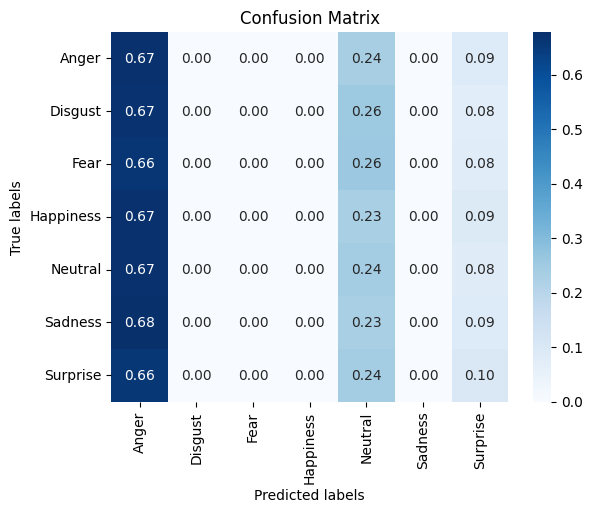

In [32]:
class_names = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

sns.heatmap(cf_matrix_normal, annot=True, fmt='.2f', cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Add labels to the heatmap
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Exploration

In [87]:
results = pd.read_csv('zero_shot_berst_4_class.csv')

In [90]:
incorrect = results.loc[results['affect'] != results['predictions']]
correct = results.loc[results['affect'] == results['predictions']]

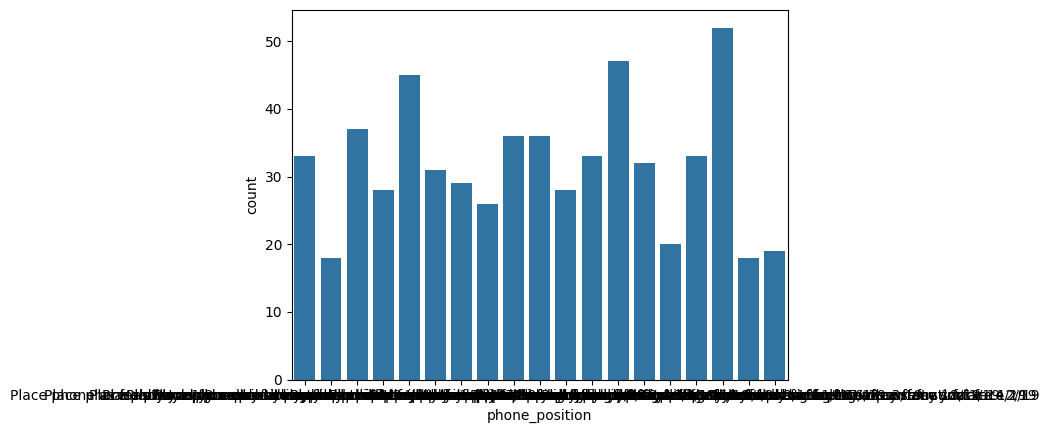

In [91]:
ax = sns.countplot(x="phone_position", data=correct)

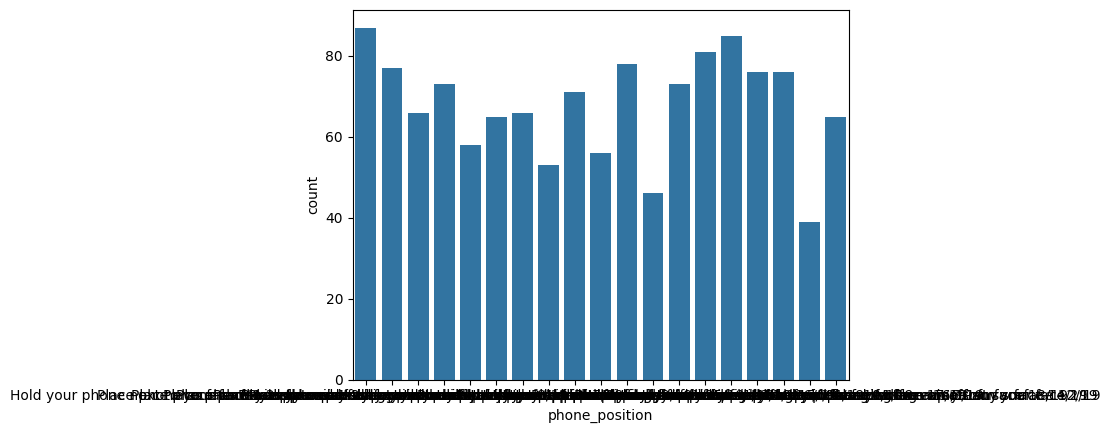

In [92]:
ax = sns.countplot(x="phone_position", data=incorrect)

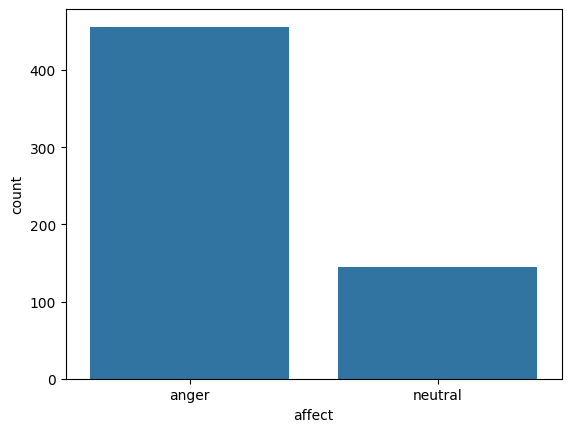

In [95]:
ax = sns.countplot(x="affect", data=correct)

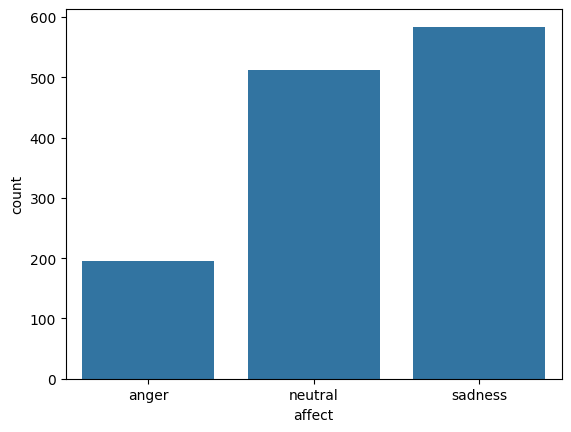

In [96]:
ax = sns.countplot(x="affect", data=incorrect)

In [45]:
incorrect['phone_position'].unique()

array(['Hold your phone next to your face with the mic facing your mouth as you would in a phone conversation 1/19',
       'Place your phone in a bag and hold it next to your hip 7/19',
       'Place phone as far away as possible while on on the opposite side of a wall from you in a bag 19/19',
       'Place phone 1-2 meters away face down on a soft surface 10/19',
       'Place phone 1-2 meters away face down on a hard surface 9/19',
       'Place phone as far away as possible while on on the opposite side of a wall from you face up on any surface 16/19',
       'Hold your phone next to your face with your hand covering the mic 3/19',
       'Place phone as far away as possible while on on the opposite side of a wall from you face down on a hard surface 17/19',
       'Hold your phone next to your hip with your hand covering the mic 5/19',
       'Place phone 1-2 meters away in a bag 11/19',
       'Place phone as far away as possible while on on the opposite side of a wall from you 

In [88]:
distance_label = results['phone_position']
distance_label = [file.replace('Hold your phone next to your face with the mic facing your mouth as you would in a phone conversation 1/19', 'face') for file in distance_label]
distance_label = [file.replace('Hold your phone next to your face but with the mic/phone facing away from your face 2/19', 'face') for file in distance_label]
distance_label = [file.replace('Hold your phone next to your face with your hand covering the mic 3/19', 'face') for file in distance_label]
distance_label = [file.replace('Hold your phone next to your hip with the back of phone on your palm 4/19', 'very close') for file in distance_label]
distance_label = [file.replace('Hold your phone next to your hip with your hand covering the mic 5/19', 'very close') for file in distance_label]
distance_label = [file.replace('Place your phone in your pocket 6/19', 'very close') for file in distance_label]
distance_label = [file.replace('Place your phone in a bag and hold it next to your hip 7/19', 'very close') for file in distance_label]
distance_label = [file.replace('Place phone 1-2 meters away face up on any surface 8/19', 'close') for file in distance_label]
distance_label = [file.replace('Place phone 1-2 meters away face down on a hard surface 9/19', 'close') for file in distance_label]
distance_label = [file.replace('Place phone 1-2 meters away face down on a soft surface 10/19', 'close') for file in distance_label]
distance_label = [file.replace('Place phone 1-2 meters away in a bag 11/19', 'close') for file in distance_label]
distance_label = [file.replace('Place phone on the opposite side of the room face up on any surface 12/19', 'far') for file in distance_label]
distance_label = [file.replace('Place phone on the opposite side of the room face down on a hard surface 13/19', 'far') for file in distance_label]
distance_label = [file.replace('Place phone on the opposite side of the room face down on a soft surface 14/19', 'far') for file in distance_label]
distance_label = [file.replace('Place phone on the opposite side of the room in a bag 15/19', 'far') for file in distance_label]
distance_label = [file.replace('Place phone as far away as possible while on on the opposite side of a wall from you face up on any surface 16/19', 'very far') for file in distance_label]
distance_label = [file.replace('Place phone as far away as possible while on on the opposite side of a wall from you face down on a hard surface 17/19', 'very far') for file in distance_label]
distance_label = [file.replace('Place phone as far away as possible while on on the opposite side of a wall from you face down on a soft surface 18/19', 'very far') for file in distance_label]
distance_label = [file.replace('Place phone as far away as possible while on on the opposite side of a wall from you in a bag 19/19', 'very far') for file in distance_label]


In [89]:
results['distance_label'] = distance_label

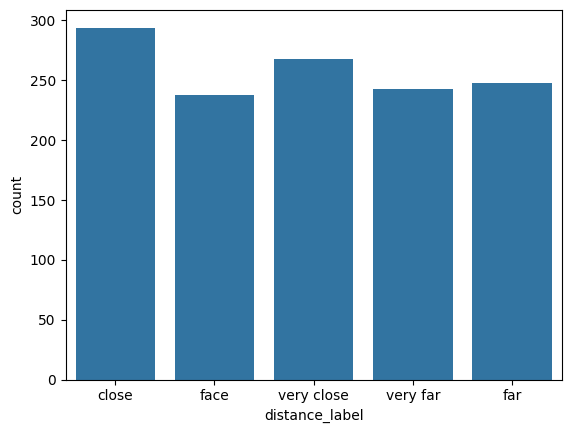

In [93]:
ax = sns.countplot(x="distance_label", data=incorrect)

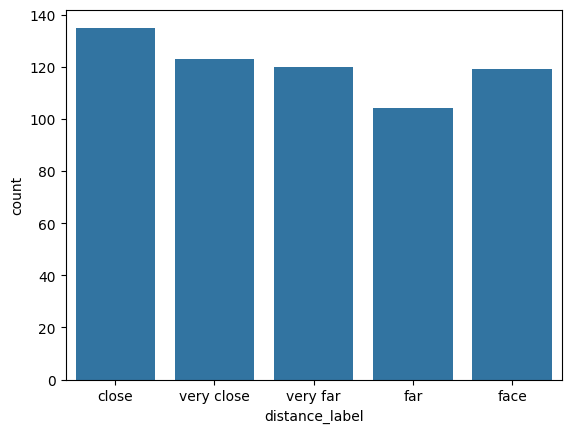

In [94]:
ax = sns.countplot(x="distance_label", data=correct)